In [7]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



In [8]:
def read_json_file(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

def extract_values_by_bin(data, key, num_bins):
    bin_values = [[] for _ in range(num_bins)]
    runtime = []
    for filename, phen_data in data.items():
        for bin_data in phen_data[key]:
            bin_index = bin_data['index' if key == 'sigma' else 'bin']
            if bin_index < num_bins:
                bin_values[bin_index].append(bin_data[key])
        runtime.append(phen_data['runtime'])
    return bin_values, runtime

def process_py_rhe_data(folder_path, num_files, num_bins):
    py_rhe_sigma = [[] for _ in range(num_bins)]
    py_rhe_h2 = [[] for _ in range(num_bins)]
    py_rhe_enrichment = [[] for _ in range(num_bins)]
    py_rhe_runtime = []

    for i in range(num_files):
        file_path = os.path.join(folder_path, f'output_{i}.json')
        file_data = read_json_file(file_path)
        for bin_index in range(num_bins):
            py_rhe_sigma[bin_index].append(file_data['sigma_ests_total'][bin_index])
            py_rhe_h2[bin_index].append(file_data['h2_total'][bin_index])
            py_rhe_enrichment[bin_index].append(file_data['enrichment_total'][bin_index] if file_data['enrichment_total'] else 0)
        py_rhe_runtime.append(file_data['runtime'])

    return py_rhe_sigma, py_rhe_h2, py_rhe_enrichment, py_rhe_runtime


# def plot_comparison(ori_values, pyrhe_values, metric_name, bin_index):
#     plt.scatter(ori_values, pyrhe_values, label=f'Bin {bin_index + 1}')
#     max_value = max(max(ori_values), max(pyrhe_values))
#     min_value = min(min(ori_values), min(pyrhe_values))
#     plt.plot([min_value, max_value], [min_value, max_value], 'k--', label='y = x')
#     plt.xlabel('Original RHE output')
#     plt.ylabel('PyRHE output')
#     plt.title(f'{metric_name} Comparison for Bin {bin_index + 1}')
#     plt.legend()
#     plt.grid(True)
#     plt.axis('equal')

# def plot_metrics(ori_data, pyrhe_data, num_bins):
#     metrics = ['sigma', 'h2', 'enrichment']
#     for bin_index in range(num_bins):
#         plt.figure(figsize=(18, 5))
#         for i, metric in enumerate(metrics):
#             plt.subplot(1, 3, i+1)
#             plot_comparison(ori_data[metric][bin_index], pyrhe_data[metric][bin_index], metric.upper(), bin_index)
#         plt.tight_layout()
#         plt.show()



def plot_comparison(all_ori_values, all_pyrhe_values, metric_name):
    colors = list(mcolors.TABLEAU_COLORS)  
    for bin_index, (ori_values, pyrhe_values) in enumerate(zip(all_ori_values, all_pyrhe_values)):
        plt.scatter(ori_values, pyrhe_values, label=f'Bin {bin_index + 1}', color=colors[bin_index % len(colors)])
    
    max_value = max(max(max(vals) for vals in all_ori_values), max(max(vals) for vals in all_pyrhe_values))
    min_value = min(min(min(vals) for vals in all_ori_values), min(min(vals) for vals in all_pyrhe_values))
    plt.plot([min_value, max_value], [min_value, max_value], 'k--', label='y = x')

    plt.xlabel('Original RHE output')
    plt.ylabel('PyRHE output')
    plt.title(f'{metric_name} Comparison Across Bins')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')

def plot_metrics(ori_data, pyrhe_data, num_bins):
    plt.figure(figsize=(18, 6))

    metrics = ['sigma', 'h2', 'enrichment']
    for i, metric in enumerate(metrics):
        plt.subplot(1, 3, i+1)
        plot_comparison(ori_data[metric], pyrhe_data[metric], metric.upper())
    
    plt.tight_layout()
    plt.show()

def summarize_results(use_cov, num_bins, num_samples):
    cov = "cov" if use_cov else "no_cov"
    ori_file_path = f'/u/home/j/jiayini/project-sriram/RHE_project/results_200k/original_result/{cov}/bin_{num_bins}/summary.json'
    pyrhe_folder = f'/u/home/j/jiayini/project-sriram/RHE_project/results_200k/pyrhe_output/{cov}/bin_{num_bins}'

    ori_data = read_json_file(ori_file_path)
    pyrhe_sigma, pyrhe_h2, pyrhe_enrichment, pyrhe_runtime = process_py_rhe_data(pyrhe_folder, num_samples, num_bins)

    ori_sigma_bins, ori_runtime = extract_values_by_bin(ori_data, 'sigma', num_bins)
    ori_h2_bins, _ = extract_values_by_bin(ori_data, 'h2', num_bins)
    ori_enrichment_bins, _ = extract_values_by_bin(ori_data, 'enrichment', num_bins)

    if num_bins == 1 and not ori_enrichment_bins[0]:
        ori_enrichment_bins = [[1]]
    
    ori_data = {
        'sigma': ori_sigma_bins,
        'h2': ori_h2_bins,
        'enrichment': ori_enrichment_bins,
    }
    pyrhe_data = {
        'sigma': pyrhe_sigma,
        'h2': pyrhe_h2,
        'enrichment': pyrhe_enrichment,
    }
    plot_metrics(ori_data, pyrhe_data, num_bins)


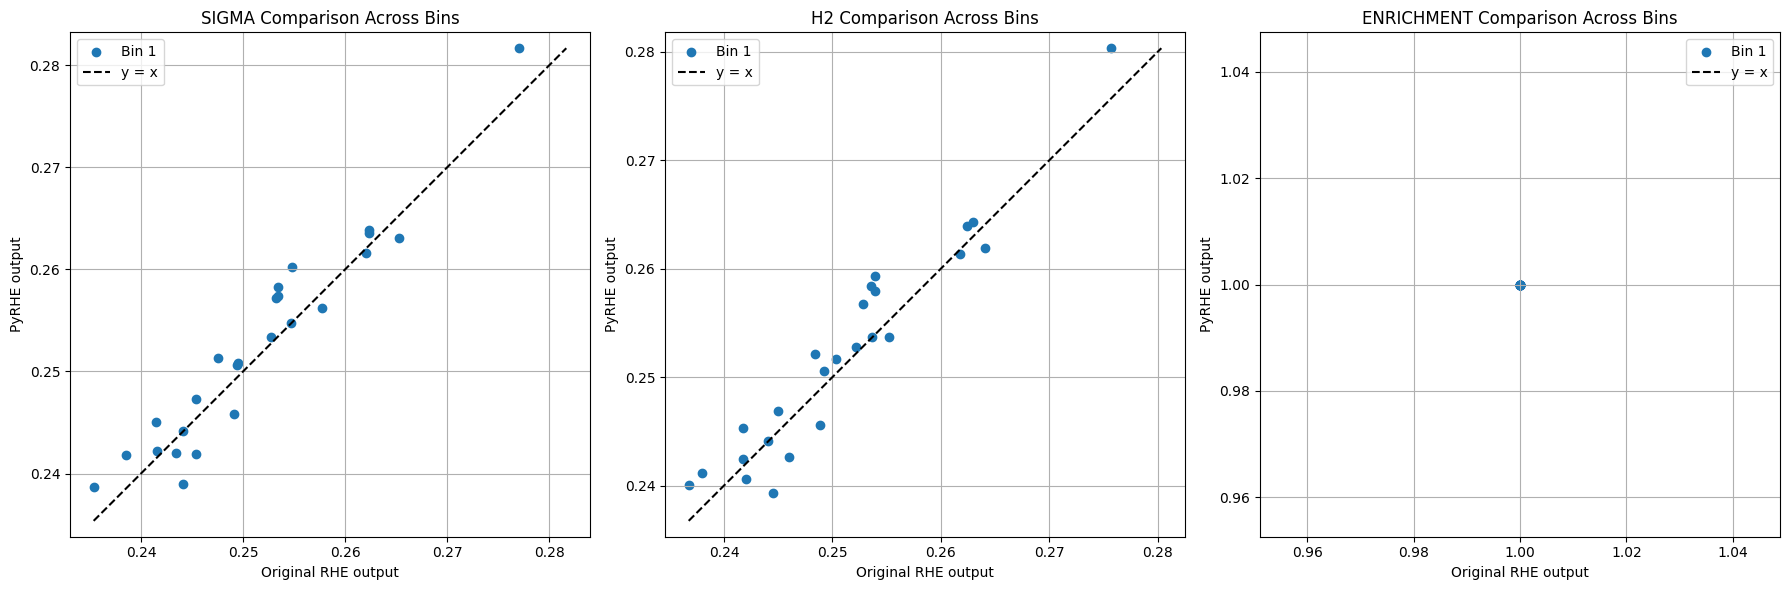

In [9]:
summarize_results(False, 1, 25)


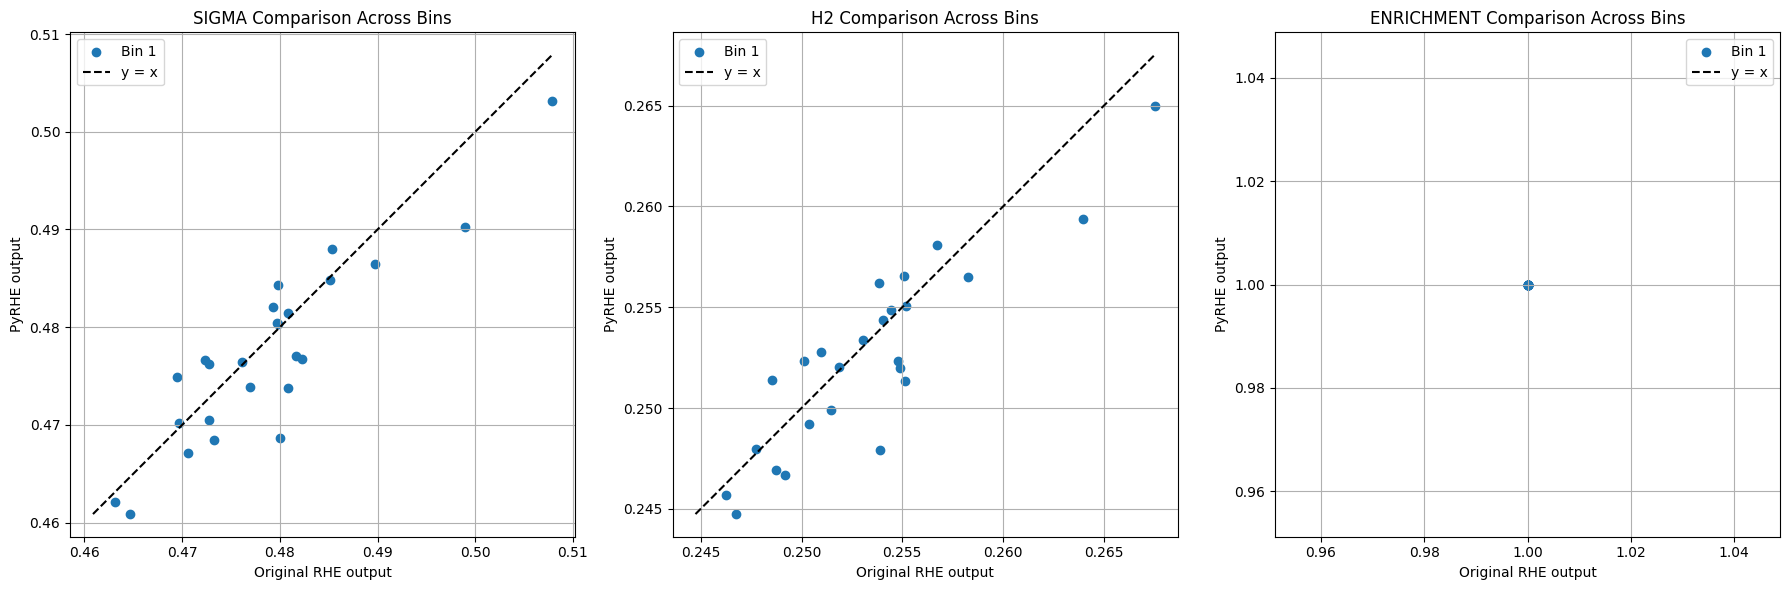

In [10]:
summarize_results(True, 1, 25)


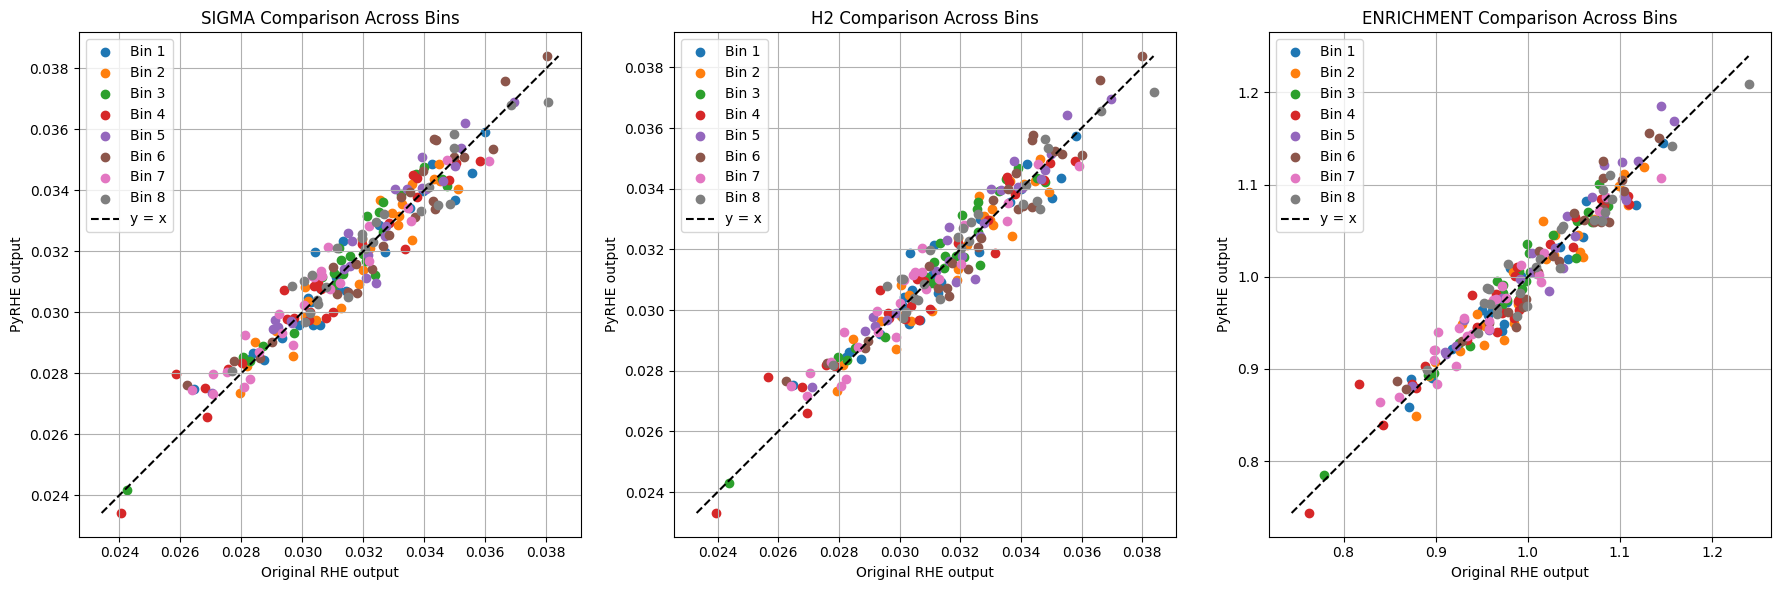

In [11]:
summarize_results(False, 8, 25)


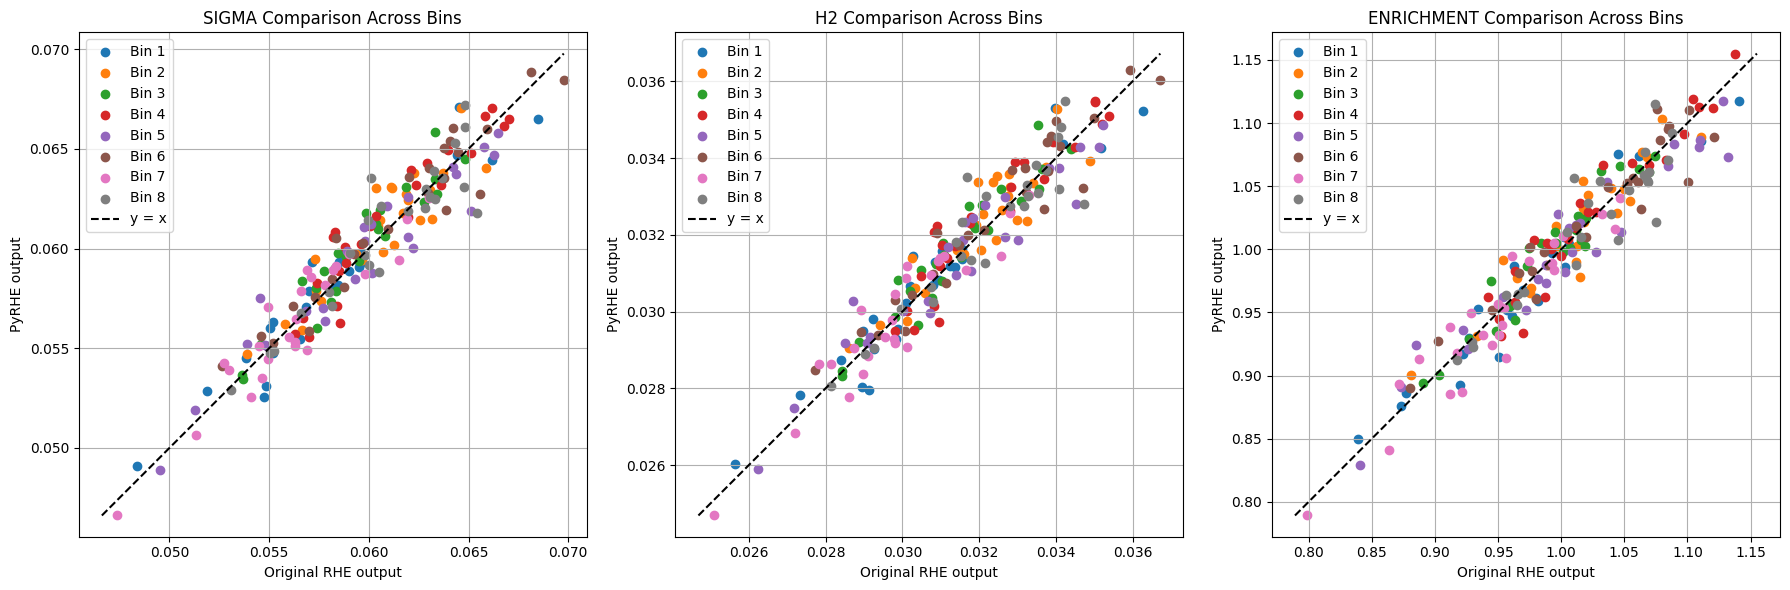

In [12]:
summarize_results(True, 8, 25)
